# Load data

In [ ]:
import os
import numpy as np
from numpy import asarray
from skimage.io import imread, imshow
from skimage.transform import resize

def read_img(p):
        im = []

        foldersname = ['1','2','3','4','6']
        for foldername in foldersname:
                path = p+"/"+foldername
                for filename in os.listdir(path):
                    if filename.endswith(".png"):
                        image = imread(path+"/"+filename)
                        image = resize(image,(32,32))
                        data = np.array(image)
                        im.append(data)
                        continue
                    else:
                        continue
        return im

In [ ]:
train = read_img(p="/content/drive/MyDrive/assi3_CV/training")
train = np.array(train)

test = read_img(p="/content/drive/MyDrive/assi3_CV/testing")
test = np.array(test)

tr_class1 = [0]*180
tr_class2 = [1]*180
tr_class3 = [2]*180
tr_class4 = [3]*180
tr_class5 = [4]*180

train_labels = tr_class1 + tr_class2 + tr_class3 + tr_class4 + tr_class5
train_labels = np.array(train_labels)


te_class1 = [0]*20
te_class2 = [1]*20
te_class3 = [2]*20
te_class4 = [3]*20
te_class5 = [4]*20

test_labels = te_class1 + te_class2 + te_class3 + te_class4 + te_class5
test_labels = np.array(test_labels)



# Use Vgg16 (two bolcks)

In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
import tensorflow
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

vgg_model.trainable = False ## Not trainable weights

model = Sequential()
#add vgg layer (inputLayer, block1, block2)
for layer in vgg_model.layers[:7]:   
         model.add(layer)


In [ ]:

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
block1_conv1 (Conv2D)        (None, 32, 32, 64)        1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 32, 32, 64)        36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 16, 16, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 16, 16, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 16, 16, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 8, 8, 128)         0         
Total params: 260,160
Trainable params: 0
Non-trainable params: 260,160
__________________________________________________

# Classification Network

# Add FC layers


In [ ]:
from tensorflow.keras import layers, models
from keras.layers import Conv2D

inputs = tensorflow.keras.Input(shape=(32,32,3))
x = model(inputs,training=False)
x = tensorflow.keras.layers.Flatten()(x)
x = tensorflow.keras.layers.Dense(200, activation='relu')(x)
x = tensorflow.keras.layers.Dense(55, input_dim=14, kernel_initializer='uniform')(x)
x = tensorflow.keras.layers.Activation('tanh')(x)
x = tensorflow.keras.layers.Dense(5, kernel_initializer='uniform')(x)
x = tensorflow.keras.layers.Dense(5, activation='softmax')(x)
model = tensorflow.keras.Model(inputs,x)

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
sequential (Sequential)      (None, 8, 8, 128)         260160    
_________________________________________________________________
flatten (Flatten)            (None, 8192)              0         
_________________________________________________________________
dense (Dense)                (None, 200)               1638600   
_________________________________________________________________
dense_1 (Dense)              (None, 55)                11055     
_________________________________________________________________
activation (Activation)      (None, 55)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 5)                 280   

# Train model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train_labels, test_size=0.33, random_state=42,stratify=train_labels)


history = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_val,y_val))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
19/19 [==============================] - 3s 143ms/step - loss: 1.6054 - accuracy: 0.2239 - val_loss: 1.5949 - val_accuracy: 0.2626
Epoch 2/30
19/19 [==============================] - 3s 134ms/step - loss: 1.5908 - accuracy: 0.2554 - val_loss: 1.5930 - val_accuracy: 0.2626
Epoch 3/30
19/19 [==============================] - 2s 133ms/step - loss: 1.5811 - accuracy: 0.2720 - val_loss: 1.5912 - val_accuracy: 0.2660
Epoch 4/30
19/19 [==============================] - 2s 133ms/step - loss: 1.5738 - accuracy: 0.2769 - val_loss: 1.5882 - val_accuracy: 0.2795
Epoch 5/30
19/19 [==============================] - 2s 131ms/step - loss: 1.5639 - accuracy: 0.3134 - val_loss: 1.5854 - val_accuracy: 0.2862
Epoch 6/30
19/19 [==============================] - 2s 133ms/step - loss: 1.5562 - accuracy: 0.3582 - val_loss: 1.5831 - val_accuracy: 0.2761
Epoch 7/30
19/19 [==============================] - 2s 133ms/step - loss: 1.5466 - accuracy: 0.3449 - val_loss: 1.5793 - val_accuracy: 0.2761
Epoch 

## Model evaluation using traing data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_train_pred = np.argmax(model.predict(X_train),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_train, Y_train_pred))

Confusion Matrix
[[118   0   1   0   1]
 [ 18  76  21   2   4]
 [ 17  19  67  17   1]
 [ 12  10  23  67   8]
 [ 41  11   5  28  36]]


## Model evaluation using validation data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_val_pred = np.argmax(model.predict(X_val),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_val, Y_val_pred))
print('Classification Report')
target_names = ['1', '2', '3','4','6']
print(classification_report(y_val, Y_val_pred, target_names=target_names))

Confusion Matrix
[[41  3  9  3  4]
 [17 13 17  9  3]
 [17  9 14 15  4]
 [ 9  6 12 22 11]
 [19  8  6 16 10]]
Classification Report
              precision    recall  f1-score   support

           1       0.40      0.68      0.50        60
           2       0.33      0.22      0.27        59
           3       0.24      0.24      0.24        59
           4       0.34      0.37      0.35        60
           6       0.31      0.17      0.22        59

    accuracy                           0.34       297
   macro avg       0.32      0.34      0.32       297
weighted avg       0.33      0.34      0.32       297



# Train model on all traing data

In [ ]:
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)


history_t = model.fit(train, train_labels, epochs=30, batch_size=32)


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


29/29 [==============================] - 3s 88ms/step - loss: 1.3551 - accuracy: 0.4944
Epoch 2/30
29/29 [==============================] - 3s 87ms/step - loss: 1.3471 - accuracy: 0.5067
Epoch 3/30
29/29 [==============================] - 3s 87ms/step - loss: 1.3312 - accuracy: 0.5144
Epoch 4/30
29/29 [==============================] - 3s 87ms/step - loss: 1.3076 - accuracy: 0.5378
Epoch 5/30
29/29 [==============================] - 3s 87ms/step - loss: 1.2953 - accuracy: 0.5544
Epoch 6/30
29/29 [==============================] - 3s 87ms/step - loss: 1.2741 - accuracy: 0.5600
Epoch 7/30
29/29 [==============================] - 3s 88ms/step - loss: 1.2634 - accuracy: 0.5533
Epoch 8/30
29/29 [==============================] - 3s 88ms/step - loss: 1.2424 - accuracy: 0.5733
Epoch 9/30
29/29 [==============================] - 3s 87ms/step - loss: 1.2257 - accuracy: 0.5767
Epoch 10/30
29/29 [==============================] - 3s 88ms/step - loss: 1.2118 - accuracy: 0.6033
Epoch 11/30
29/29 [=

##Model evaluation using testing data

In [ ]:

Y_pred = np.argmax(model.predict(test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_labels, Y_pred))
print('Classification Report')
target_names = ['1', '2', '3','4','6']
print(classification_report(test_labels, Y_pred, target_names=target_names))


Confusion Matrix
[[10  2  7  0  1]
 [ 3  7  9  1  0]
 [ 3  1 12  4  0]
 [ 1  3  7  9  0]
 [ 1  0  7 12  0]]
Classification Report
              precision    recall  f1-score   support

           1       0.56      0.50      0.53        20
           2       0.54      0.35      0.42        20
           3       0.29      0.60      0.39        20
           4       0.35      0.45      0.39        20
           6       0.00      0.00      0.00        20

    accuracy                           0.38       100
   macro avg       0.35      0.38      0.35       100
weighted avg       0.35      0.38      0.35       100



#Learning curves

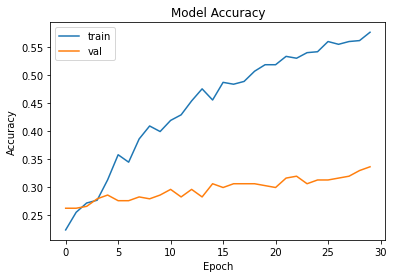

In [ ]:
import matplotlib.pyplot as plt

k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


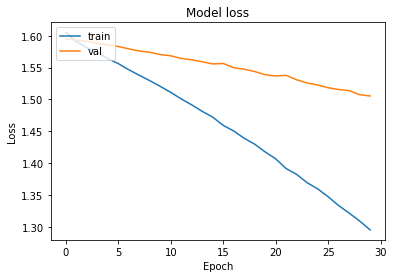

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



# Regression Network

## Add FC layers

In [ ]:
tr_class1 = [1]*180
tr_class2 = [2]*180
tr_class3 = [3]*180
tr_class4 = [4]*180
tr_class5 = [6]*180

train_labels = tr_class1 + tr_class2 + tr_class3 + tr_class4 + tr_class5
train_labels = np.array(train_labels)


te_class1 = [1]*20
te_class2 = [2]*20
te_class3 = [3]*20
te_class4 = [4]*20
te_class5 = [6]*20

test_labels = te_class1 + te_class2 + te_class3 + te_class4 + te_class5
test_labels = np.array(test_labels)


In [ ]:
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from keras.models import Sequential
import tensorflow
vgg_model = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(32, 32, 3))

vgg_model.trainable = False ## Not trainable weights

model2 = Sequential()
#add vgg layer (inputLayer, block1, block2)
for layer in vgg_model.layers[:7]:   
         model2.add(layer)


In [ ]:
from tensorflow.keras import layers, models

inputs_r = tensorflow.keras.Input(shape=(32,32,3))
r = model2(inputs_r,training=False)
r = tensorflow.keras.layers.Flatten()(r)
r = tensorflow.keras.layers.Dense(200, activation='relu')(r)
r = tensorflow.keras.layers.Dense(50, input_dim=14, kernel_initializer='uniform')(r)
r = tensorflow.keras.layers.Activation('tanh')(r)
r = tensorflow.keras.layers.Dense(1, activation='relu6')(r) 
model2 = tensorflow.keras.Model(inputs_r,r)

## Train model 

In [ ]:
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model2.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['mean_squared_error'],
)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train_labels, test_size=0.33, random_state=42,stratify=train_labels)

history2 = model2.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_val,y_val))


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/30
19/19 [==============================] - 3s 142ms/step - loss: 3.3893 - mean_squared_error: 3.3893 - val_loss: 2.9127 - val_mean_squared_error: 2.9127
Epoch 2/30
19/19 [==============================] - 2s 133ms/step - loss: 2.8963 - mean_squared_error: 2.8963 - val_loss: 2.8995 - val_mean_squared_error: 2.8995
Epoch 3/30
19/19 [==============================] - 3s 135ms/step - loss: 2.8217 - mean_squared_error: 2.8217 - val_loss: 2.8855 - val_mean_squared_error: 2.8855
Epoch 4/30
19/19 [==============================] - 3s 134ms/step - loss: 2.6844 - mean_squared_error: 2.6844 - val_loss: 2.8840 - val_mean_squared_error: 2.8840
Epoch 5/30
19/19 [==============================] - 2s 134ms/step - loss: 2.6346 - mean_squared_error: 2.6346 - val_loss: 2.6055 - val_mean_squared_error: 2.6055
Epoch 6/30
19/19 [==============================] - 3s 134ms/step - loss: 2.4288 - mean_squared_error: 2.4288 - val_loss: 2.8737 - val_mean_squared_error: 2.8737
Epoch 7/30
19/19 [==========

## Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error

Y_pred_val_l = model2.predict(X_val)
print("The MSE loss = ",mean_squared_error(y_val,Y_pred_val_l))


The MSE loss =  1.689900012416649


## Train model on all traing data

In [ ]:
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model2.compile(
    optimizer=optimizer,
    loss='mean_squared_error',
    metrics=['mean_squared_error'],
)

history2_t = model2.fit(train, train_labels, epochs=30, batch_size=32)


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


29/29 [==============================] - 3s 90ms/step - loss: 1.7232 - mean_squared_error: 1.7232
Epoch 2/30
29/29 [==============================] - 3s 87ms/step - loss: 1.2901 - mean_squared_error: 1.2901
Epoch 3/30
29/29 [==============================] - 3s 87ms/step - loss: 1.6545 - mean_squared_error: 1.6545
Epoch 4/30
29/29 [==============================] - 3s 88ms/step - loss: 1.1567 - mean_squared_error: 1.1567
Epoch 5/30
29/29 [==============================] - 3s 88ms/step - loss: 0.9996 - mean_squared_error: 0.9996
Epoch 6/30
29/29 [==============================] - 3s 88ms/step - loss: 1.5678 - mean_squared_error: 1.5678
Epoch 7/30
29/29 [==============================] - 3s 88ms/step - loss: 1.0456 - mean_squared_error: 1.0456
Epoch 8/30
29/29 [==============================] - 3s 88ms/step - loss: 1.1569 - mean_squared_error: 1.1569
Epoch 9/30
29/29 [==============================] - 3s 88ms/step - loss: 0.8543 - mean_squared_error: 0.8543
Epoch 10/30
29/29 [===========

## Evaluate the model

In [ ]:
from sklearn.metrics import mean_squared_error

Y_pred_l = model2.predict(test)
print("The MSE loss = ",mean_squared_error(test_labels,Y_pred_l))


The MSE loss =  1.9004994607610373


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
for index,item in enumerate(Y_pred_l):
  if item >=0 and item <1:
    Y_pred_l[index] = 1  
  elif item > 1 and item <= 2:
    Y_pred_l[index] = 2
  elif item > 2 and item <= 3:
    Y_pred_l[index] = 3
  elif item > 3 and item <= 4:
    Y_pred_l[index] = 4      
  elif item > 4:
    Y_pred_l[index] = 6

print('Confusion Matrix')
print(confusion_matrix(test_labels, Y_pred_l))
target_names = ['1', '2', '3','4','6']
print(classification_report(test_labels, Y_pred_l, target_names=target_names))

Confusion Matrix
[[ 3 12  4  1  0]
 [ 0 10  9  1  0]
 [ 0  4  8  3  5]
 [ 0  2  3  6  9]
 [ 0  2  3  5 10]]
              precision    recall  f1-score   support

           1       1.00      0.15      0.26        20
           2       0.33      0.50      0.40        20
           3       0.30      0.40      0.34        20
           4       0.38      0.30      0.33        20
           6       0.42      0.50      0.45        20

    accuracy                           0.37       100
   macro avg       0.48      0.37      0.36       100
weighted avg       0.48      0.37      0.36       100



# Learning curves

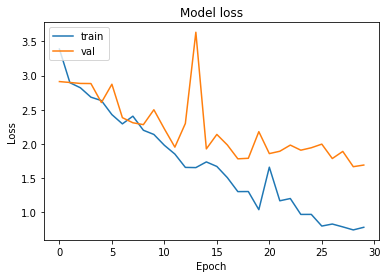

In [ ]:
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



# Discussion

For Question 3.2 / regression network the matric loss is MSE but to compare it with Question 3.1 / classification network I round the results of regression to have a confussion matrix and compare the accuracies. The accuracies and the losses are not perfect. yes the classification network has better accuracy then the regression but still there is an overfitting obivious from the learning curves in the both models. We can see in the learning curves that the accuracy of training data is more than the accuracy of the tesing/validating data and the loss of training data is less than or nearly equal the testing/validating data which mean there is overfitting problem. May be this happened because the training data is very small an the features very complex so the model need more data to learn more.

# Regularization

In [ ]:

tr_class1 = [0]*180
tr_class2 = [1]*180
tr_class3 = [2]*180
tr_class4 = [3]*180
tr_class5 = [4]*180

train_labels = tr_class1 + tr_class2 + tr_class3 + tr_class4 + tr_class5
train_labels = np.array(train_labels)


te_class1 = [0]*20
te_class2 = [1]*20
te_class3 = [2]*20
te_class4 = [3]*20
te_class5 = [4]*20

test_labels = te_class1 + te_class2 + te_class3 + te_class4 + te_class5
test_labels = np.array(test_labels)

In [ ]:
from tensorflow.keras import layers, models

inputs = tensorflow.keras.Input(shape=(32,32,3))
x = model(inputs,training=False)
x = tensorflow.keras.layers.Flatten()(x)
x = tensorflow.keras.layers.Dense(200, activation='relu')(x)
x = tensorflow.keras.layers.Dense(55, input_dim=14, kernel_initializer='uniform')(x)
x = tensorflow.keras.layers.BatchNormalization()(x)
x = tensorflow.keras.layers.Activation('tanh')(x)
x = tensorflow.keras.layers.Dropout(0.5)(x)
x = tensorflow.keras.layers.Dense(5, kernel_initializer='uniform')(x)
x = tensorflow.keras.layers.BatchNormalization()(x)
x = tensorflow.keras.layers.Dense(5, activation='softmax')(x)
model = tensorflow.keras.Model(inputs,x)

In [ ]:
model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_5 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
model (Functional)           (None, 5)                 1910125   
_________________________________________________________________
flatten_2 (Flatten)          (None, 5)                 0         
_________________________________________________________________
dense_7 (Dense)              (None, 200)               1200      
_________________________________________________________________
dense_8 (Dense)              (None, 55)                11055     
_________________________________________________________________
batch_normalization (BatchNo (None, 55)                220       
_________________________________________________________________
activation_2 (Activation)    (None, 55)                0   

# Train model

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)
from sklearn.model_selection import train_test_split
X_train, X_val, y_train, y_val = train_test_split(train, train_labels, test_size=0.33, random_state=42,stratify=train_labels)


history = model.fit(X_train, y_train, epochs=30, batch_size=32,validation_data=(X_val,y_val))


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


19/19 [==============================] - 3s 146ms/step - loss: 1.4249 - accuracy: 0.3914 - val_loss: 1.6070 - val_accuracy: 0.1919
Epoch 2/30
19/19 [==============================] - 3s 135ms/step - loss: 1.1600 - accuracy: 0.5390 - val_loss: 1.6050 - val_accuracy: 0.3939
Epoch 3/30
19/19 [==============================] - 3s 137ms/step - loss: 1.0091 - accuracy: 0.6252 - val_loss: 1.6035 - val_accuracy: 0.4478
Epoch 4/30
19/19 [==============================] - 3s 134ms/step - loss: 0.9332 - accuracy: 0.6899 - val_loss: 1.6017 - val_accuracy: 0.5522
Epoch 5/30
19/19 [==============================] - 3s 136ms/step - loss: 0.9207 - accuracy: 0.7015 - val_loss: 1.5991 - val_accuracy: 0.6532
Epoch 6/30
19/19 [==============================] - 3s 135ms/step - loss: 0.8661 - accuracy: 0.7512 - val_loss: 1.5971 - val_accuracy: 0.6061
Epoch 7/30
19/19 [==============================] - 3s 135ms/step - loss: 0.8185 - accuracy: 0.8060 - val_loss: 1.5933 - val_accuracy: 0.6801
Epoch 8/30
19/19 

## Model evaluation using training data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_train_pred = np.argmax(model.predict(X_train),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_train, Y_train_pred))

Confusion Matrix
[[120   0   0   0   0]
 [  0 121   0   0   0]
 [  0   0 121   0   0]
 [  0   1   0 119   0]
 [  1   0   0   0 120]]


## Model evaluation using validation data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_val_pred = np.argmax(model.predict(X_val),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_val, Y_val_pred))
print('Classification Report')
target_names = ['1', '2', '3','4','6']
print(classification_report(y_val, Y_val_pred, target_names=target_names))

Confusion Matrix
[[48  0  8  0  4]
 [ 1 43 12  2  1]
 [ 1  7 41 10  0]
 [ 0  7  4 38 11]
 [ 1  0  4 11 43]]
Classification Report
              precision    recall  f1-score   support

           1       0.94      0.80      0.86        60
           2       0.75      0.73      0.74        59
           3       0.59      0.69      0.64        59
           4       0.62      0.63      0.63        60
           6       0.73      0.73      0.73        59

    accuracy                           0.72       297
   macro avg       0.73      0.72      0.72       297
weighted avg       0.73      0.72      0.72       297



In [ ]:
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)


history_t = model.fit(train, train_labels, epochs=30, batch_size=32)


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


29/29 [==============================] - 3s 88ms/step - loss: 0.6919 - accuracy: 0.8589
Epoch 2/30
29/29 [==============================] - 3s 88ms/step - loss: 0.6382 - accuracy: 0.8833
Epoch 3/30
29/29 [==============================] - 3s 89ms/step - loss: 0.6785 - accuracy: 0.8700
Epoch 4/30
29/29 [==============================] - 3s 88ms/step - loss: 0.6336 - accuracy: 0.8911
Epoch 5/30
29/29 [==============================] - 3s 88ms/step - loss: 0.5770 - accuracy: 0.9222
Epoch 6/30
29/29 [==============================] - 3s 88ms/step - loss: 0.5948 - accuracy: 0.9011
Epoch 7/30
29/29 [==============================] - 3s 88ms/step - loss: 0.5956 - accuracy: 0.9156
Epoch 8/30
29/29 [==============================] - 3s 88ms/step - loss: 0.5353 - accuracy: 0.9389
Epoch 9/30
29/29 [==============================] - 3s 87ms/step - loss: 0.5263 - accuracy: 0.9522
Epoch 10/30
29/29 [==============================] - 3s 88ms/step - loss: 0.5592 - accuracy: 0.9278
Epoch 11/30
29/29 [=

## Model evaluation using testing data

In [ ]:

Y_pred = np.argmax(model.predict(test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_labels, Y_pred))
print('Classification Report')
target_names = ['1', '2', '3','4','6']
print(classification_report(test_labels, Y_pred, target_names=target_names))


Confusion Matrix
[[ 6  5  5  1  3]
 [ 2 12  5  0  1]
 [ 1  3 10  5  1]
 [ 1  7  6  4  2]
 [ 3  4  3  7  3]]
Classification Report
              precision    recall  f1-score   support

           1       0.46      0.30      0.36        20
           2       0.39      0.60      0.47        20
           3       0.34      0.50      0.41        20
           4       0.24      0.20      0.22        20
           6       0.30      0.15      0.20        20

    accuracy                           0.35       100
   macro avg       0.35      0.35      0.33       100
weighted avg       0.35      0.35      0.33       100



# Learning curves

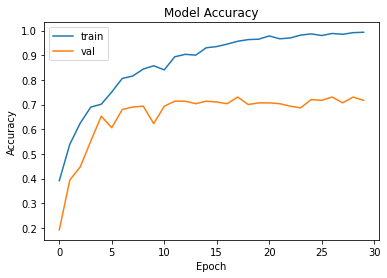

In [ ]:
import matplotlib.pyplot as plt

k = ''
if 'accuracy' in history.history :
    k = 'accuracy'    

if 'acc' in history.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history.history[k])
    plt.plot(history.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


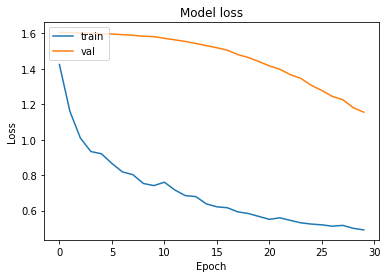

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



# Data augmentation

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

aug = ImageDataGenerator(
		rotation_range=20,
		zoom_range=0.15,
		width_shift_range=0.2,
		height_shift_range=0.2,
		shear_range=0.15,
		horizontal_flip=True,
		fill_mode="nearest")

history3 = model.fit(x=aug.flow(X_train, y_train, batch_size=32), epochs=30, batch_size=32,validation_data=(X_val,y_val))



Epoch 1/30
19/19 [==============================] - 3s 154ms/step - loss: 1.7971 - accuracy: 0.3532 - val_loss: 1.2924 - val_accuracy: 0.4949
Epoch 2/30
19/19 [==============================] - 3s 145ms/step - loss: 1.6724 - accuracy: 0.3831 - val_loss: 2.3209 - val_accuracy: 0.2357
Epoch 3/30
19/19 [==============================] - 3s 145ms/step - loss: 1.5657 - accuracy: 0.3433 - val_loss: 1.7436 - val_accuracy: 0.2694
Epoch 4/30
19/19 [==============================] - 3s 144ms/step - loss: 1.5156 - accuracy: 0.3615 - val_loss: 1.9219 - val_accuracy: 0.2525
Epoch 5/30
19/19 [==============================] - 3s 144ms/step - loss: 1.5487 - accuracy: 0.3599 - val_loss: 1.6860 - val_accuracy: 0.2862
Epoch 6/30
19/19 [==============================] - 3s 145ms/step - loss: 1.5423 - accuracy: 0.3599 - val_loss: 1.6469 - val_accuracy: 0.2727
Epoch 7/30
19/19 [==============================] - 3s 145ms/step - loss: 1.5392 - accuracy: 0.3267 - val_loss: 1.5260 - val_accuracy: 0.2828
Epoch 

## Model evaluation using training data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_train_pred = np.argmax(model.predict(X_train),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_train, Y_train_pred))

Confusion Matrix
[[114   0   0   2   4]
 [ 21  56  14  13  17]
 [ 15  13  17  43  33]
 [  3   0   1  63  53]
 [  6   1   0  13 101]]


## Model evaluation using validation data

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
Y_val_pred = np.argmax(model.predict(X_val),axis=1)
print('Confusion Matrix')
print(confusion_matrix(y_val, Y_val_pred))
print('Classification Report')
target_names = ['1', '2', '3','4','6']
print(classification_report(y_val, Y_val_pred, target_names=target_names))

Confusion Matrix
[[55  1  1  0  3]
 [13 21 10  8  7]
 [13  9  3 21 13]
 [ 1  2  0 16 41]
 [ 2  1  0  8 48]]
Classification Report
              precision    recall  f1-score   support

           1       0.65      0.92      0.76        60
           2       0.62      0.36      0.45        59
           3       0.21      0.05      0.08        59
           4       0.30      0.27      0.28        60
           6       0.43      0.81      0.56        59

    accuracy                           0.48       297
   macro avg       0.44      0.48      0.43       297
weighted avg       0.44      0.48      0.43       297



In [ ]:
optimizer = tensorflow.keras.optimizers.SGD(lr=0.001)
model.compile(
    optimizer=optimizer,
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy'],
)


history3_t = model.fit(x=aug.flow(train,train_labels, batch_size=32), epochs=30, batch_size=32)


Epoch 1/30


/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


29/29 [==============================] - 4s 97ms/step - loss: 1.3744 - accuracy: 0.4144
Epoch 2/30
29/29 [==============================] - 3s 96ms/step - loss: 1.3268 - accuracy: 0.4378
Epoch 3/30
29/29 [==============================] - 3s 97ms/step - loss: 1.3214 - accuracy: 0.4511
Epoch 4/30
29/29 [==============================] - 3s 96ms/step - loss: 1.3253 - accuracy: 0.4300
Epoch 5/30
29/29 [==============================] - 3s 96ms/step - loss: 1.3386 - accuracy: 0.4311
Epoch 6/30
29/29 [==============================] - 3s 97ms/step - loss: 1.3265 - accuracy: 0.4333
Epoch 7/30
29/29 [==============================] - 3s 95ms/step - loss: 1.3049 - accuracy: 0.4378
Epoch 8/30
29/29 [==============================] - 3s 97ms/step - loss: 1.3275 - accuracy: 0.4189
Epoch 9/30
29/29 [==============================] - 3s 96ms/step - loss: 1.2996 - accuracy: 0.4578
Epoch 10/30
29/29 [==============================] - 3s 97ms/step - loss: 1.3029 - accuracy: 0.4633
Epoch 11/30
29/29 [=

## Model evaluation using testing data

In [ ]:

Y_pred = np.argmax(model.predict(test),axis=1)
print('Confusion Matrix')
print(confusion_matrix(test_labels, Y_pred))
print('Classification Report')
target_names = ['1', '2', '3','4','6']
print(classification_report(test_labels, Y_pred, target_names=target_names))


Confusion Matrix
[[ 9  8  0  2  1]
 [ 3 11  4  1  1]
 [ 0  7  3  9  1]
 [ 1  2  2 11  4]
 [ 1  2  0  9  8]]
Classification Report
              precision    recall  f1-score   support

           1       0.64      0.45      0.53        20
           2       0.37      0.55      0.44        20
           3       0.33      0.15      0.21        20
           4       0.34      0.55      0.42        20
           6       0.53      0.40      0.46        20

    accuracy                           0.42       100
   macro avg       0.44      0.42      0.41       100
weighted avg       0.44      0.42      0.41       100



# Learning curves

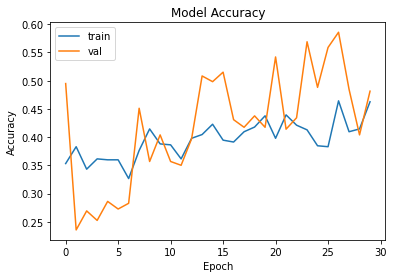

In [ ]:
import matplotlib.pyplot as plt

k = ''
if 'accuracy' in history3.history :
    k = 'accuracy'    

if 'acc' in history3.history :
    k = 'acc'
    
if k != '' :    
    plt.plot(history3.history[k])
    plt.plot(history3.history['val_'+k])
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend(['train', 'val'], loc='upper left')
    plt.show()


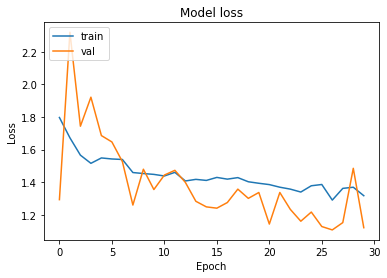

In [ ]:
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()



# Discussion

The learning curves are become better after regrularization and augmantion. The validation curve become more nearset to the training curve so the the overfit decrease. Beacuse the regrulaization decrease the model weights so the model will not ovrfit and the augmantation increase the learning data which make many forms of each image in the training data so the model learn more from these different forms. The accuracy of the validating data become more larger from around 30% to more than 40% so the both techniques do a very well job and enchance the learning.